In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

In [2]:
# ! pip install -U pip setuptools wheel

In [3]:
! pip install -U spacy

In [4]:
!python -m spacy download en_core_web_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 59.3 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [83]:
! pip install --upgrade scikit-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.4/13.4 MB 75.3 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2


In [85]:
import numpy
numpy.__version__

'1.25.2'

In [79]:
import pandas as pd

from imblearn.over_sampling import RandomOverSampler

import matplotlib.pyplot as plt

import numpy as np

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

import spacy

import zipfile

In [6]:
!unzip "/content/phish.zip"

Archive:  /content/phish.zip
  inflating: Phishing_Email.csv      


In [7]:
os.listdir('/content/')

['.config', 'Phishing_Email.csv', 'phish.zip', 'sample_data']

In [8]:
#Import the Dataset
df= pd.read_csv("/content/Phishing_Email.csv")
df.head()

,Unnamed: 0,Email Text,Email Type
0,0,"re : 6 . 1100 , disc : uniformitarianism , re ...",Safe Email
1,1,the other side of * galicismos * * galicismo *...,Safe Email
2,2,re : equistar deal tickets are you still avail...,Safe Email
3,3,\nHello I am your hot lil horny toy.\n I am...,Phishing Email
4,4,software at incredibly low prices ( 86 % lower...,Phishing Email


In [88]:
df.iloc[0, 1]

're : 6 . 1100 , disc : uniformitarianism , re : 1086 ; sex / lang dick hudson \'s observations on us use of \'s on \' but not \'d aughter \' as a vocative are very thought-provoking , but i am not sure that it is fair to attribute this to " sons " being " treated like senior relatives " . for one thing , we do n\'t normally use \' brother \' in this way any more than we do \'d aughter \' , and it is hard to imagine a natural class comprising senior relatives and \'s on \' but excluding \' brother \' . for another , there seem to me to be differences here . if i am not imagining a distinction that is not there , it seems to me that the senior relative terms are used in a wider variety of contexts , e . g . , calling out from a distance to get someone \'s attention , and hence at the beginning of an utterance , whereas \'s on \' seems more natural in utterances like \' yes , son \' , \' hand me that , son \' than in ones like \' son ! \' or \' son , help me ! \' ( although perhaps these

In [9]:
# Check NAN values
df.isna().sum()

Unnamed: 0     0
Email Text    16
Email Type     0
dtype: int64

In [10]:
#Drop tha Na values
df = df.dropna()
print(df.isna().sum())

Unnamed: 0    0
Email Text    0
Email Type    0
dtype: int64


In [11]:
#dataset shape
df.shape

(18634, 3)

In [12]:
# Count the occurrences of each E-mail type.
email_type_counts = df['Email Type'].value_counts()
print(email_type_counts)


Email Type
Safe Email        11322
Phishing Email     7312
Name: count, dtype: int64


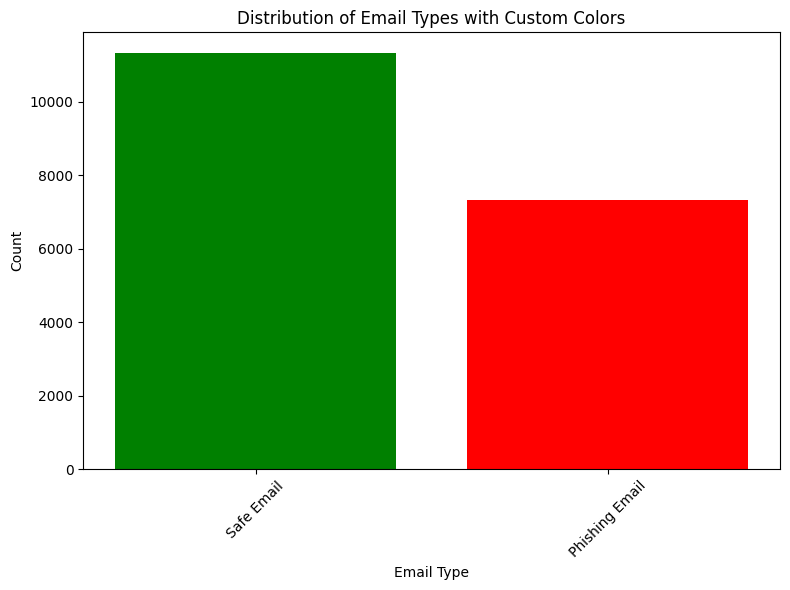

In [13]:
# Create the bar chart
# Create a list of unique email types
unique_email_types = email_type_counts.index.tolist()

# Define a custom color map
color_map = {
    'Phishing Email': 'red',
    'Safe Email': 'green',}

# Map the colors to each email type
colors = [color_map.get(email_type, 'gray') for email_type in unique_email_types]

# Create the bar chart with custom colors
plt.figure(figsize=(8, 6))
plt.bar(unique_email_types, email_type_counts, color=colors)
plt.xlabel('Email Type')
plt.ylabel('Count')
plt.title('Distribution of Email Types with Custom Colors')
plt.xticks(rotation=45)

# Show the chart
plt.tight_layout()
plt.show()


### Strategies for Handling Imbalance

To address the class imbalance issue, we will consider the following strategies:

#### 1. Resampling Techniques

   a. **Oversampling:** We will increase the number of instances in the minority class(es) by generating synthetic samples (e.g., using SMOTE) to balance the class distribution.

   b. **Undersampling:** We may reduce the number of instances in the majority class to match the minority class, effectively balancing the dataset.

In [14]:
# We will use undersapling technique
Safe_Email = df[df["Email Type"]== "Safe Email"]
Phishing_Email = df[df["Email Type"]== "Phishing Email"]
Safe_Email = Safe_Email.sample(Phishing_Email.shape[0])

In [15]:
# lets check the sahpe again
Safe_Email.shape,Phishing_Email.shape

((7312, 3), (7312, 3))

In [16]:
# lest create a new Data with the balanced E-mail types
Data= pd.concat([Safe_Email, Phishing_Email], ignore_index = True)
Data.head()

,Unnamed: 0,Email Text,Email Type
0,7680,gallup news good news : i ' ve just received w...,Safe Email
1,13654,http://oposite.stsci.edu/pubinfo/pr/2002/21/\n...,Safe Email
2,14620,new books : historical linguistics new titles ...,Safe Email
3,1635,Because of this:\nhttp://hrw.org/press/2002/08...,Safe Email
4,14639,tag + workshop registration and accommodations...,Safe Email


### Our Dataset is ready

In [17]:
# split the data into a metrix of features X and Dependent Variable y
X = Data["Email Text"].values
y = Data["Email Type"].values

In [18]:
# lets splitting Our Data
from sklearn.model_selection import train_test_split
X_train,x_test,y_train,y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

### Build RandomForestClassifier Model

In [19]:
# Importing Libraries for the model ,Tfidf and Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline

# define the Classifier
classifier = Pipeline([("tfidf",TfidfVectorizer() ),("classifier",RandomForestClassifier(n_estimators=10))])# add another hyperparamters as U want

In [20]:
# Trian Our model
classifier.fit(X_train,y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('classifier', RandomForestClassifier(n_estimators=10))])

In [21]:
# Prediction
y_pred = classifier.predict(x_test)

In [22]:
# Importing classification_report,accuracy_score,confusion_matrix
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix

In [23]:
#accuracy_score
accuracy_score(y_test,y_pred)

0.9360683760683761

In [24]:
#confusion_matrix
confusion_matrix(y_test,y_pred)

array([[1414,   54],
       [ 133, 1324]])

In [25]:
#classification_report
classification_report(y_test,y_pred)

'                precision    recall  f1-score   support\n\nPhishing Email       0.91      0.96      0.94      1468\n    Safe Email       0.96      0.91      0.93      1457\n\n      accuracy                           0.94      2925\n     macro avg       0.94      0.94      0.94      2925\n  weighted avg       0.94      0.94      0.94      2925\n'

**Let us try the oversampling now**

In [29]:
ros = RandomOverSampler(random_state=42, sampling_strategy = 'minority')

In [30]:
X_to_be_oversampled = df.loc[:, 'Email Text']
y_to_be_oversampled = df.loc[:, 'Email Type']

In [31]:
X_to_be_oversampled

0        re : 6 . 1100 , disc : uniformitarianism , re ...
1        the other side of * galicismos * * galicismo *...
2        re : equistar deal tickets are you still avail...
3        \nHello I am your hot lil horny toy.\n    I am...
4        software at incredibly low prices ( 86 % lower...
                               ...                        
18645    date a lonely housewife always wanted to date ...
18646    request submitted : access request for anita ....
18647    re : important - prc mtg hi dorn & john , as y...
18648    press clippings - letter on californian utilit...
18649                                                empty
Name: Email Text, Length: 18634, dtype: object

In [32]:
X_to_be_oversampled, y_to_be_oversampled = pd.DataFrame(X_to_be_oversampled), pd.DataFrame(y_to_be_oversampled, columns = ['Email Type'])

In [33]:
X_oversampled, y_oversampled = ros.fit_resample(X_to_be_oversampled, y_to_be_oversampled)

In [34]:
X_oversampled.shape, y_oversampled.shape

((22644, 1), (22644, 1))

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X_oversampled, y_oversampled, random_state = 42, test_size = .2)

In [36]:
X_train.shape, y_train.shape

((18115, 1), (18115, 1))

In [37]:
X_train = np.array(X_train).ravel()
y_train = np.array(y_train).ravel()
X_train.shape, y_train.shape

((18115,), (18115,))

In [38]:
X_test = np.array(X_test).ravel()
y_test = np.array(y_test).ravel()

In [39]:
oversampler_rf_classifier = Pipeline([("tfidf",TfidfVectorizer() ),("classifier",RandomForestClassifier(n_estimators=10))])

In [40]:
oversampler_rf_classifier.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('classifier', RandomForestClassifier(n_estimators=10))])

In [41]:
cross_val_score(oversampler_rf_classifier, X_train, y_train, cv=3)

array([0.94999172, 0.94518052, 0.94849288])

In [42]:
oversampler_rf_classifier.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('classifier', RandomForestClassifier(n_estimators=10))])

In [43]:
y_pred = oversampler_rf_classifier.predict(X_test)
accuracy_score(y_test, y_pred)

0.9494369618017222

**Let us try using spacy to format the `Email Text` first**

In [45]:
nlp = spacy.load('en_core_web_sm')

In [46]:
oversampled_values = X_oversampled.loc[:, 'Email Text'].values

In [47]:
oversampled_values_len = list()
for i in oversampled_values:
    oversampled_values_len.append(len(i))

In [48]:
max(oversampled_values_len)

17036692

In [49]:
for i, number in enumerate(oversampled_values_len):
    if int(number) > 1949780:
        print(f"{i} -- {number}")

12485 -- 17036692


In [50]:
oversampled_values_len.sort(reverse=True)

In [51]:
oversampled_values_len[:10]

[17036692, 194978, 129635, 120761, 107989, 103893, 92786, 90646, 87972, 87972]

In [52]:
oversampled_values_df = pd.DataFrame(oversampled_values, columns=['Email Text'])

In [53]:
oversampled_values_df = oversampled_values_df[oversampled_values_df.index != 12485]

In [54]:
X_oversampled_revamped = oversampled_values_df.copy()

In [55]:
y_oversampled_revamped = y_oversampled[y_oversampled.index != 12485]

In [56]:
len(X_oversampled_revamped), len(y_oversampled_revamped)

(22643, 22643)

In [58]:
def preprocess(text):
    doc = nlp(text)
    tokens = [token.lemma_ for token in doc if not token.is_stop and not token.is_punct]
    return ' '.join(tokens)

In [60]:
X_oversampled_series = X_oversampled_revamped.loc[:, 'Email Text']

In [61]:
X_preprocessed = X_oversampled_series.apply(preprocess)

In [62]:
X_preprocessed = pd.DataFrame(X_preprocessed)
X_preprocessed.to_csv('/content/X_preprocessed.csv', index=False)

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y_oversampled_revamped, random_state = 42, test_size = .2)

In [64]:
X_train = np.array(X_train).ravel()
y_train = np.array(y_train).ravel()
X_test = np.array(X_test).ravel()
y_test = np.array(y_test).ravel()

In [65]:
scipy_processed_rf_classifier = Pipeline([("tfidf",TfidfVectorizer() ), ("classifier",RandomForestClassifier(n_estimators=10))])

In [66]:
cross_val_score(scipy_processed_rf_classifier, X_train, y_train, cv=3)

array([0.94799603, 0.95362703, 0.95395826])

In [67]:
scipy_processed_rf_classifier.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('classifier', RandomForestClassifier(n_estimators=10))])

In [68]:
y_pred = scipy_processed_rf_classifier.predict(X_test)
accuracy_score(y_test, y_pred)

0.9582689335394127

In [69]:
import pickle

In [75]:
model_path = '/content/phising_rf_classifier.pkl'
with open(model_path, "wb") as file:
        model = pickle.dump(scipy_processed_rf_classifier, file)